In [1]:
#Data UCI

import chardet
import pandas as pd

# Detect the encoding of the file
with open('Global_Education.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the CSV file using the detected encoding
Global = pd.read_csv('Global_Education.csv', encoding=result['encoding'])
Global.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


**Comenzaremos implementando el modelo de Regresiòn a la data**


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error # Import mean_squared_error


X = Global.drop('Countries and areas', axis=1)
y = Global['Birth_Rate']


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el regresor de árbol de decisión
reg = DecisionTreeRegressor()

# Entrena el regresor con los datos de entrenamiento
reg.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcula el error cuadrático medio de las predicciones
mse = mean_squared_error(y_test, y_pred)

print(f'El error cuadrático medio del modelo es: {mse}')


El error cuadrático medio del modelo es: 0.4210609756097559


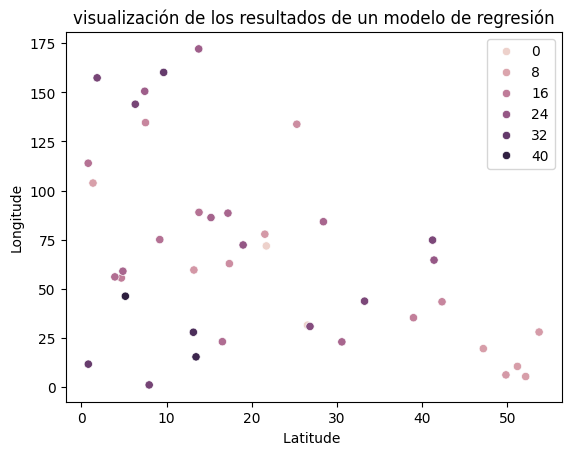

In [5]:
##visualización de los resultados de un modelo de regresión.
#La función sns.scatterplot de Seaborn está siendo utilizada para crear un gráfico de dispersión en el que cada punto
#representa un par de valores de las dos primeras características de X_test, coloreados según las predicciones (y_pred) del modelo.

import matplotlib.pyplot as plt
import seaborn as sns
# classification
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("visualización de los resultados de un modelo de regresión")
plt.show()

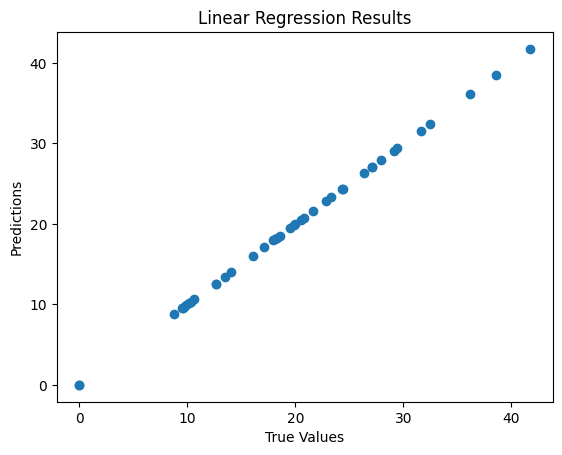

In [7]:
# regresión lineal para predecir un valor numérico continuo basado en las características proporcionadas,
#luego visualiza la relación entre las predicciones y los valores reales para evaluar el rendimiento del modelo.
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Results")
plt.show()

Entrenar un modelo de red neuronal para predecir un valor numérico basado en un conjunto de datos de entrenamiento (X_train y y_train), y luego comparar el rendimiento de este modelo con un modelo de regresión lineal previamente entrenado. El rendimiento se evalúa utilizando el error cuadrático medio

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1811.4872
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 623.2148 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 570.7766 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 364.2017 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 220.9292 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206.4718 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166.2488 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153.1830 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.7363
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117.8299 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Neural Network Mean Squared Error: 143.7489904738313
Linear Regression Mean Squared Error: 2.7747533641204635e-28


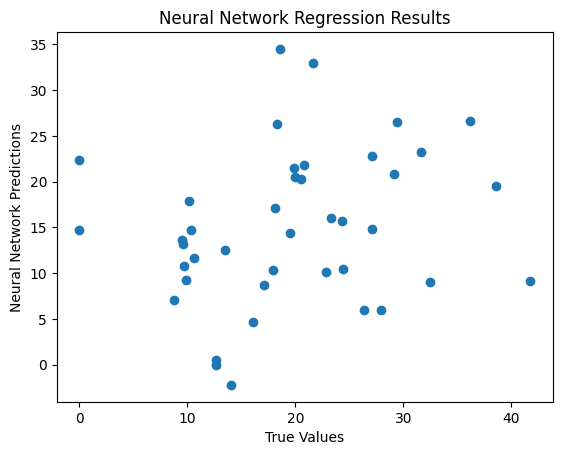

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# Neural Network with one hidden layer
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer
  keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')  # Mean squared error for regression

model.fit(X_train, y_train, epochs=10)  # Adjust epochs as needed

y_pred_nn = model.predict(X_test)

# Evaluate the neural network model
from sklearn.metrics import mean_squared_error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Mean Squared Error:", mse_nn)

# Compare with linear regression
mse_lr = mean_squared_error(y_test, y_pred)  # y_pred from LinearRegression
print("Linear Regression Mean Squared Error:", mse_lr)

# Visualize neural network predictions
plt.scatter(y_test, y_pred_nn)
plt.xlabel("True Values")
plt.ylabel("Neural Network Predictions")
plt.title("Neural Network Regression Results")
plt.show()



El siguiente codigo busca:
determinar cuál de los tres modelos ofrece el mejor rendimiento en tu conjunto de datos.
# Modelos: Cada modelo tiene sus fortalezas y debilidades. Por ejemplo, el Gradient Boosting Regression tiende a tener mejor rendimiento en la mayoría de los casos, pero también es más complejo y más costoso computacionalmente. Decision Tree Regression es más simple y fácil de interpretar, pero puede no ser tan preciso. SVR es útil para casos donde los datos tienen relaciones no lineales más complejas.

In [10]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # import the missing function

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
print("Support Vector Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("  R-squared Score:", r2_score(y_test, y_pred_svr))

print("\nDecision Tree Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("  R-squared Score:", r2_score(y_test, y_pred_tree))

print("\nGradient Boosting Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("  R-squared Score:", r2_score(y_test, y_pred_gb))

Support Vector Regression:
  Mean Squared Error: 64.4853111660741
  Mean Absolute Error: 5.67527084435046
  R-squared Score: 0.27582801166630744

Decision Tree Regression:
  Mean Squared Error: 0.2435292682926828
  Mean Absolute Error: 0.3431707317073169
  R-squared Score: 0.997265158975774

Gradient Boosting Regression:
  Mean Squared Error: 0.045669558578286994
  Mean Absolute Error: 0.15208009732812405
  R-squared Score: 0.9994871294804365


Regresión con Máquinas de Vectores de Soporte (SVR):
  Error Cuadrático Medio: 64.4853111660741
  Error Absoluto Medio: 5.67527084435046
  Puntaje R-cuadrado: 0.27582801166630744

Regresión con Árboles de Decisión:
  Error Cuadrático Medio: 0.39343658536585374
  Error Absoluto Medio: 0.4124390243902443
  Puntaje R-cuadrado: 0.9955816952860188

Regresión con Gradient Boosting:
  Error Cuadrático Medio: 0.07476771838399233
  Error Absoluto Medio: 0.17119225306939104
  Puntaje R-cuadrado: 0.9991603562686413


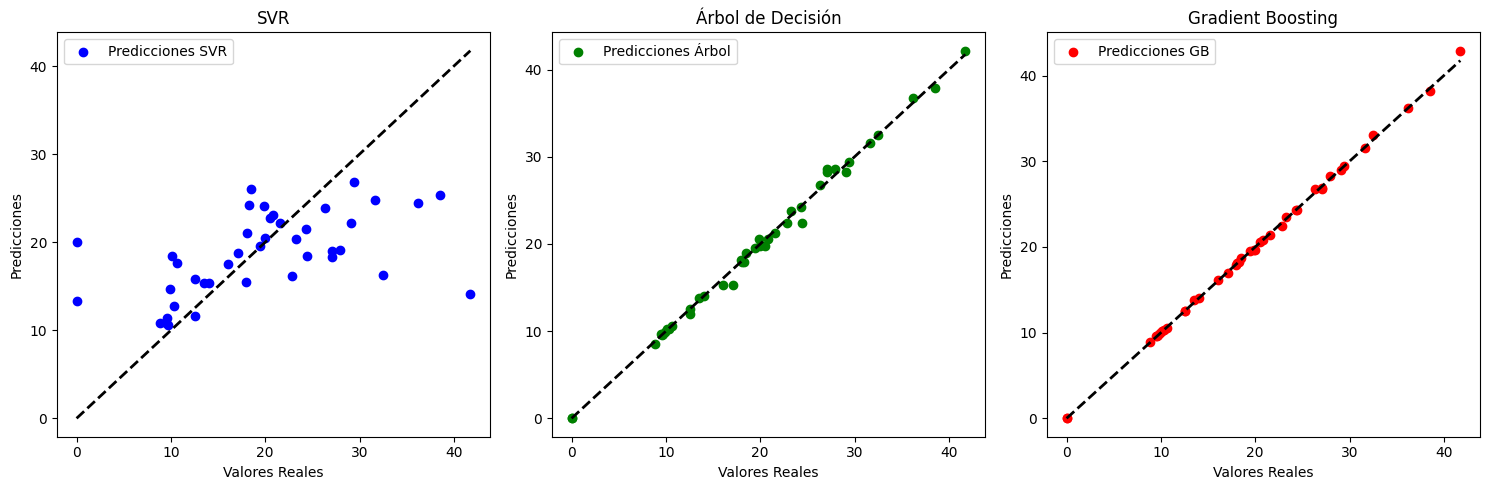

In [11]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Regresión con Máquinas de Vectores de Soporte (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Regresión con Árboles de Decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Regresión con Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluar los modelos
print("Regresión con Máquinas de Vectores de Soporte (SVR):")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_svr))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_svr))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_svr))

print("\nRegresión con Árboles de Decisión:")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_tree))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_tree))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_tree))

print("\nRegresión con Gradient Boosting:")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_gb))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_gb))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_gb))

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para SVR
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicciones SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR')
plt.legend()

# Gráfico para Árbol de Decisión
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, color='green', label='Predicciones Árbol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Decisión')
plt.legend()

# Gráfico para Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, color='red', label='Predicciones GB')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()


Conclusión:
Este código permite comparar la eficacia de tres modelos de regresión diferentes aplicados a un conjunto de datos, ayudándote a elegir el modelo que mejor se adapte a tus datos y objetivos específicos. Los gráficos proporcionan una representación visual clara de cómo cada modelo se desempeña en términos de precisión de predicción.

****Evaluemos la data utilizando el modelo de Clousters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Las etiquetas de los clusters son: [1 2 2 1 1 1 1 2 2 0 0 1 1 0 2 2 2 0 2 1 1 1 2 2 2 1 0 0 1 1 1 1 2 0 1 1 2
 2 2 2 2 1 2 1 0 2 0 0 2 1 0 1 1 2 2 2 2 1 1 0 2 1 1 0 0 2 1 2 0 2 0 1 2 1
 1 2 1 1 2 0 0 2 2 0 2 0 0 0 2 0 2 2 2 2 1 2 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0
 1 1 1 2 1 1 2 2 1 0 1 1 2 1 2 0 0 1 1 2 1 2 0 0 1 1 2 1 2 2 2 0 0 0 0 2 0
 0 1 1 2 1 1 1 2 0 1 2 1 1 0 0 0 1 1 2 1 0 2 2 1 2 0 0 1 2 2 2 1 1 2 0 2 2
 2 1 1 1 2 0 0 1 0 2 1 1 1 2 1 2 1]


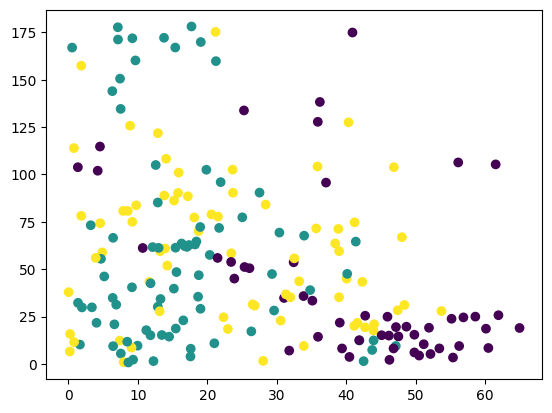

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import KMeans

# Prepara los datos
X = Global.drop('Countries and areas', axis=1)

# Crea el modelo de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajusta el modelo a los datos
kmeans.fit(X)

# Obtiene las etiquetas de los clusters
cluster_labels = kmeans.labels_
print(f'Las etiquetas de los clusters son: {cluster_labels}')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')

# Muestra el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

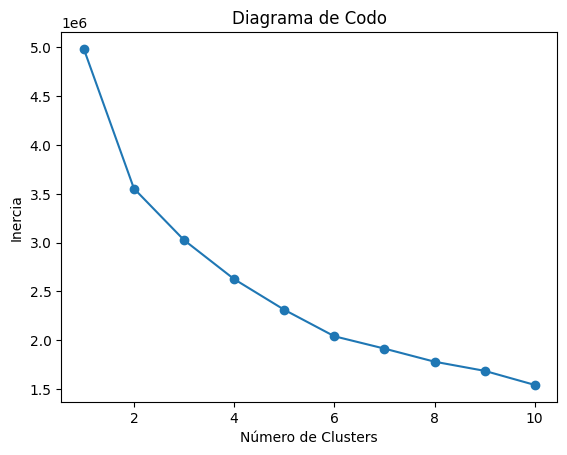

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


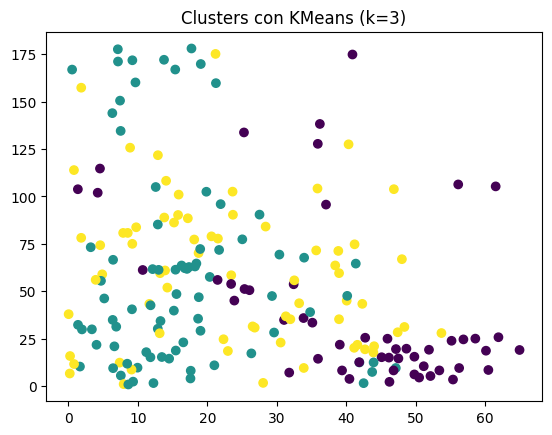

In [13]:
#Diagrama de codos

import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Grafica el diagrama de codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Diagrama de Codo')
plt.show()


optimal_n_clusters = 3
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X)

# Obtén las etiquetas de los clusters
cluster_labels = kmeans.labels_

# Visualiza los clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'Clusters con KMeans (k={optimal_n_clusters})')
plt.show()


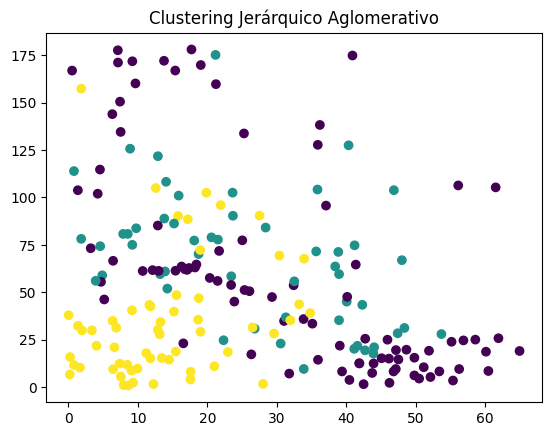

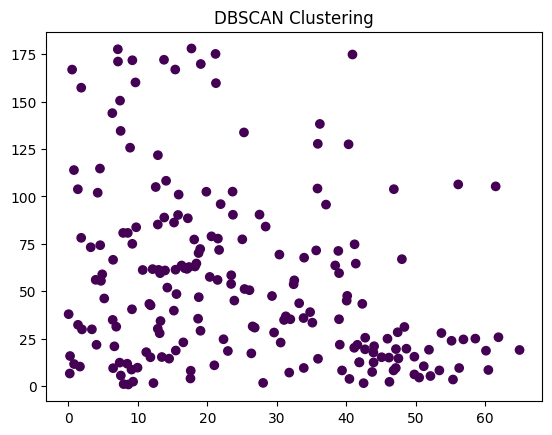

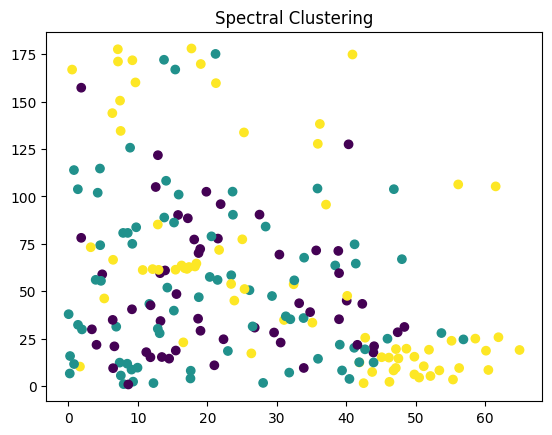

In [24]:
##GuhD01/Forum

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering

# Clustering Jerárquico Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg_labels, cmap='viridis')
plt.title('Clustering Jerárquico Aglomerativo')
plt.show()

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()


Este código aplica tres métodos diferentes de clustering no supervisado: Clustering Jerárquico Aglomerativo Este es un tipo de clustering jerárquico que agrupa puntos de datos en una estructura de árbol (dendrograma), DBSCAN basado en la densidad, que agrupa puntos de datos que están densamente conectados, y Spectral Clustering usa la estructura del grafo de datos y las técnicas de descomposición espectral (valores propios) para realizar clustering.


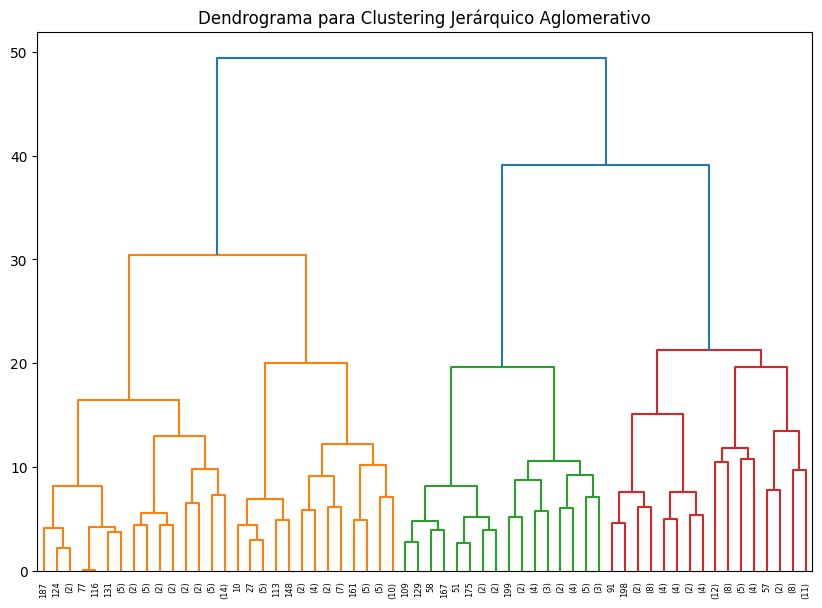

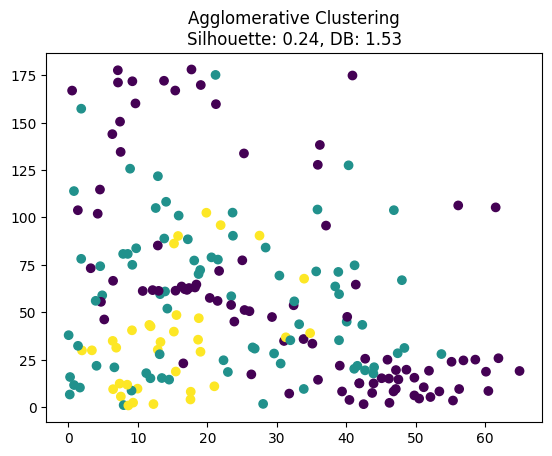

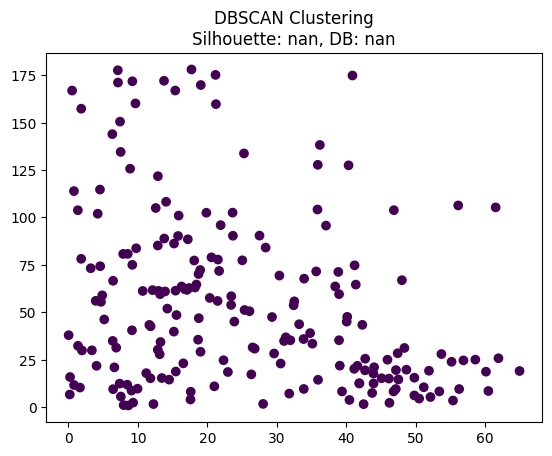

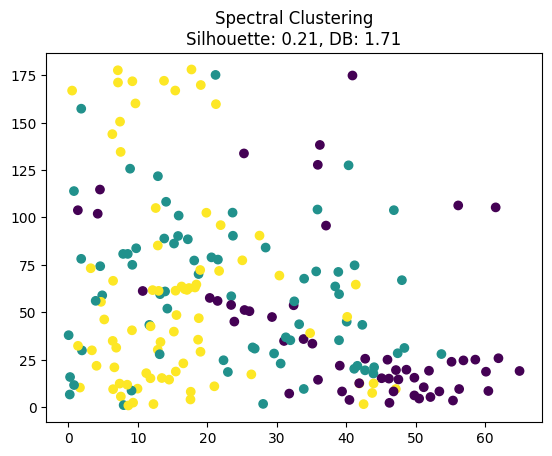

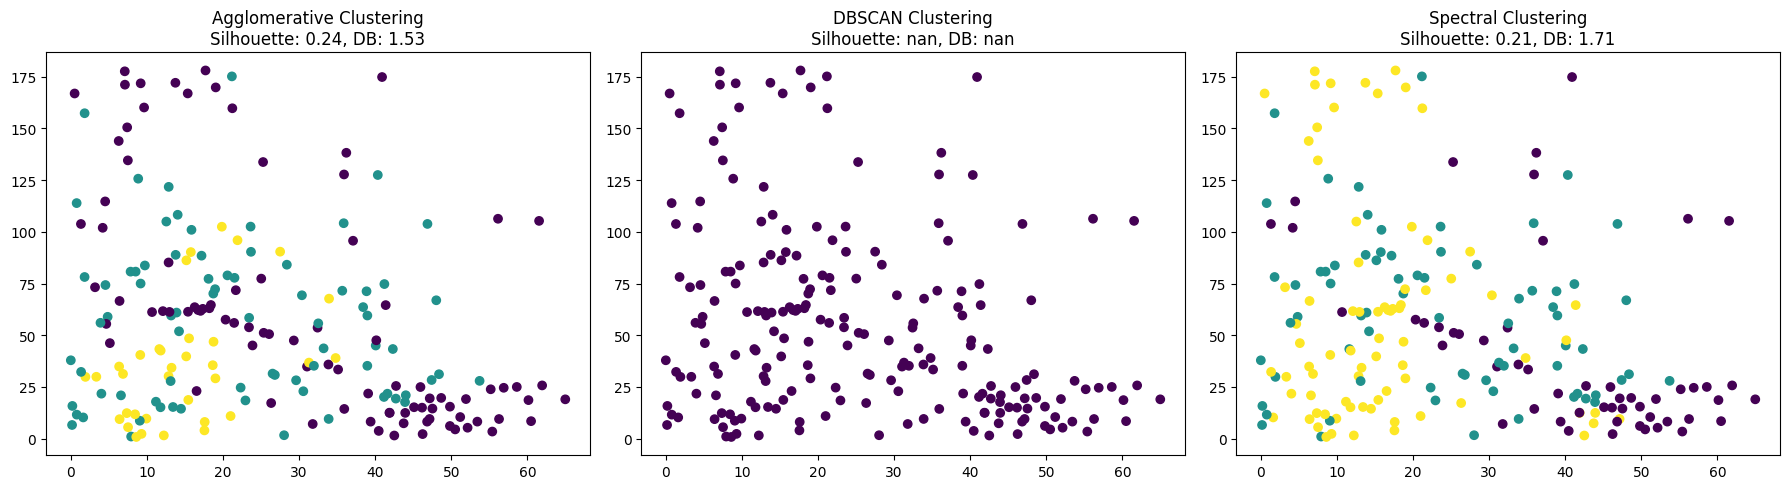

In [26]:
##MEJORAR EL RENDIMIENTO DEL MODELO ANTERIOR



# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Clustering Jerárquico Aglomerativo con Dendrograma
linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma para Clustering Jerárquico Aglomerativo')
plt.show()

# Aplicar Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Evaluación y Visualización
silhouette_agg = silhouette_score(X_scaled, agg_labels)
davies_bouldin_agg = davies_bouldin_score(X_scaled, agg_labels)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering\nSilhouette: {silhouette_agg:.2f}, DB: {davies_bouldin_agg:.2f}')
plt.show()

# 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluación y Visualización
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else float('nan')
davies_bouldin_dbscan = davies_bouldin_score(X_scaled, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else float('nan')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN Clustering\nSilhouette: {silhouette_dbscan:.2f}, DB: {davies_bouldin_dbscan:.2f}')
plt.show()

# 3. Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10)
spectral_labels = spectral.fit_predict(X_scaled)

# Evaluación y Visualización
silhouette_spectral = silhouette_score(X_scaled, spectral_labels)
davies_bouldin_spectral = davies_bouldin_score(X_scaled, spectral_labels)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=spectral_labels, cmap='viridis')
plt.title(f'Spectral Clustering\nSilhouette: {silhouette_spectral:.2f}, DB: {davies_bouldin_spectral:.2f}')
plt.show()

# Comparación en una sola figura
plt.figure(figsize=(18, 5))

# Agglomerative Clustering
plt.subplot(1, 3, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering\nSilhouette: {silhouette_agg:.2f}, DB: {davies_bouldin_agg:.2f}')

# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN Clustering\nSilhouette: {silhouette_dbscan:.2f}, DB: {davies_bouldin_dbscan:.2f}')

# Spectral Clustering
plt.subplot(1, 3, 3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=spectral_labels, cmap='viridis')
plt.title(f'Spectral Clustering\nSilhouette: {silhouette_spectral:.2f}, DB: {davies_bouldin_spectral:.2f}')

plt.tight_layout()
plt.show()


Silhouette Score y Davies-Bouldin Index: Estos puntajes cuantitativos te permiten evaluar la calidad de los clústeres generados por cada método.
Dendrograma: Te ayuda a visualizar la estructura jerárquica y seleccionar el número óptimo de clústeres para el Clustering Aglomerativo.
Gráficos comparativos: Facilitan la comparación directa entre diferentes métodos de clustering